In [50]:
#import required libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [51]:
df = sns.load_dataset('mpg')

In [52]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [53]:
#dropping columns with text data which are not a target or feature columns
df = df.drop(['origin'], axis=1)
df = df.drop(['name'], axis=1)

In [54]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [55]:
print(df.head(10))

    mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70
5  15.0          8         429.0       198.0    4341          10.0          70
6  14.0          8         454.0       220.0    4354           9.0          70
7  14.0          8         440.0       215.0    4312           8.5          70
8  14.0          8         455.0       225.0    4425          10.0          70
9  15.0          8         390.0       190.0    3850           8.5          70


In [56]:
#chekcing for number of null values
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64


In [57]:
#checking correlation between the target and feature columns
corr_matrix = df[['horsepower' ,'cylinders','displacement' , 'mpg']].corr()

In [58]:
corr_matrix

,horsepower,cylinders,displacement,mpg
horsepower,1.000000,0.842983,0.897257,-0.778427
cylinders,0.842983,1.000000,0.950721,-0.775396
displacement,0.897257,0.950721,1.000000,-0.804203
mpg,-0.778427,-0.775396,-0.804203,1.000000


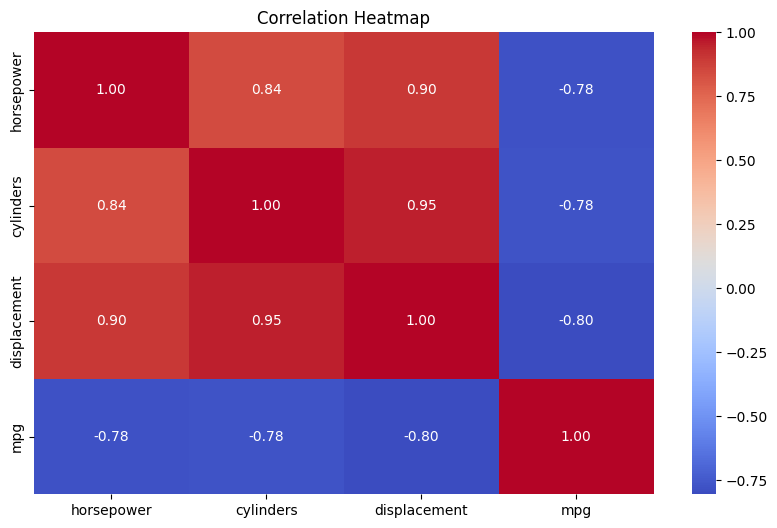

In [59]:
#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [61]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [62]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Text(0.5, 1.0, 'displacement')

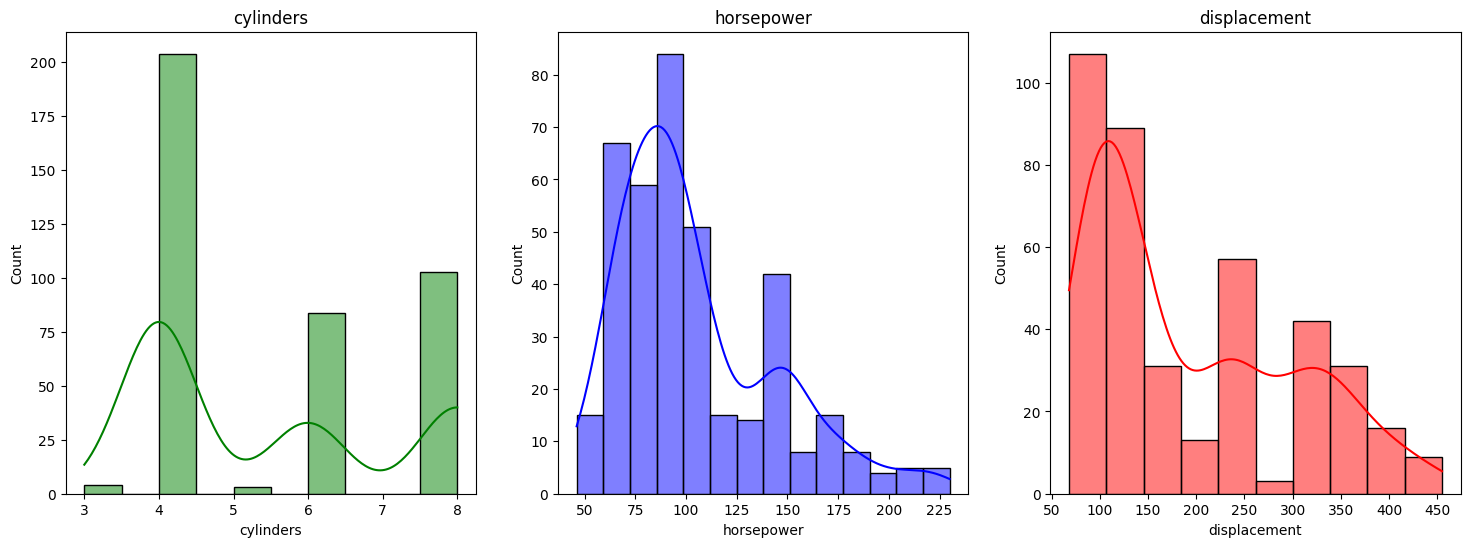

In [63]:
#histogram
fig , axes = plt.subplots(1, 3 ,figsize=(18,6))
sns.histplot(df['cylinders'] , kde = True , color= 'green' , ax= axes[0])
axes[0].set_title("cylinders")
sns.histplot(df['horsepower'], kde = True , color='blue',ax=axes[1])
axes[1].set_title("horsepower")
sns.histplot(df['displacement'], kde=True, color='red',ax=axes[2])
axes[2].set_title("displacement")



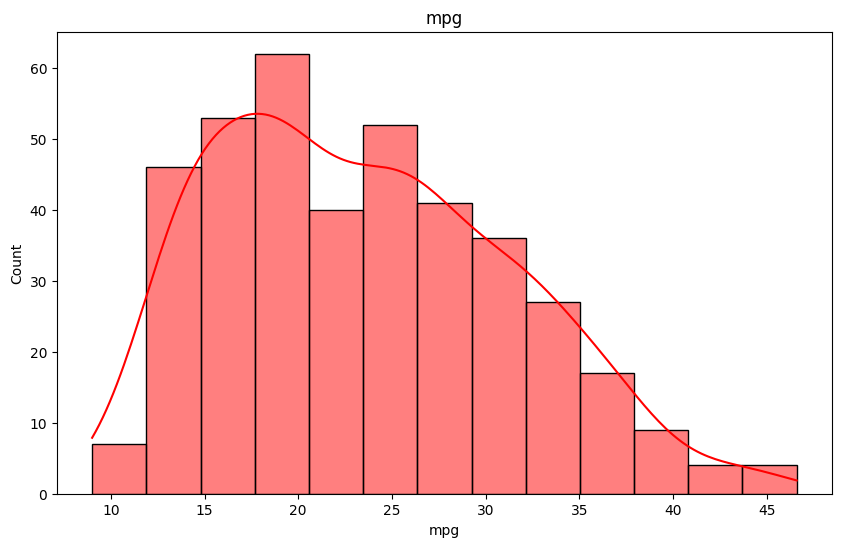

In [64]:
fig, axes = plt.subplots(figsize=(10,6))
sns.histplot(df['mpg'], kde=True, color='red', ax=axes)
axes.set_title("mpg")
plt.show()


In [65]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [66]:
df.value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model_year
46.6  4          86.0          65.0        2110    17.9          80            1
9.0   8          304.0         193.0       4732    18.5          70            1
10.0  8          307.0         200.0       4376    15.0          70            1
                 360.0         215.0       4615    14.0          70            1
11.0  8          318.0         210.0       4382    13.5          70            1
                                                                              ..
12.0  8          455.0         225.0       4951    11.0          73            1
                 429.0         198.0       4952    11.5          73            1
                 400.0         167.0       4906    12.5          73            1
                 383.0         180.0       4955    11.5          71            1
                 350.0         180.0       4499    12.5          73            1
Name: count, Length: 392, dtype: 

In [67]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [68]:
# dropping the zeroes 
df.dropna(inplace=True)

In [69]:
#checking if zeroes are dropped
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


In [71]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
dtype: int64

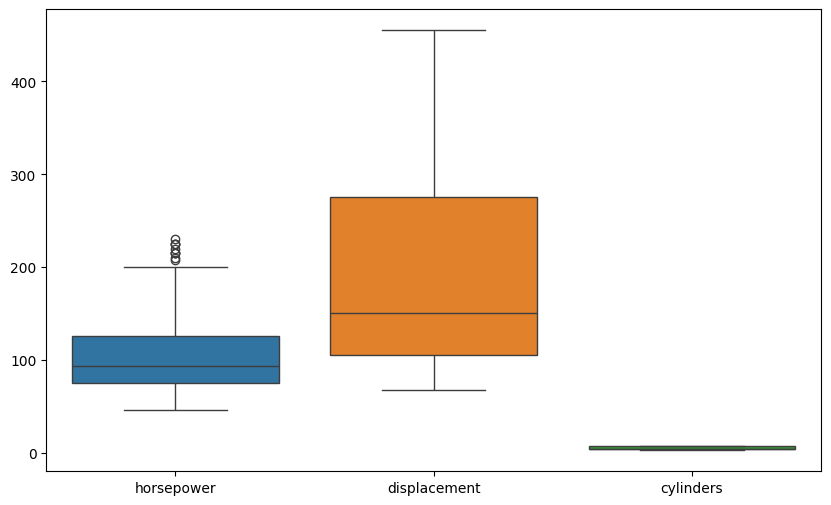

In [72]:
#check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['horsepower','displacement', 'cylinders']])
plt.show()

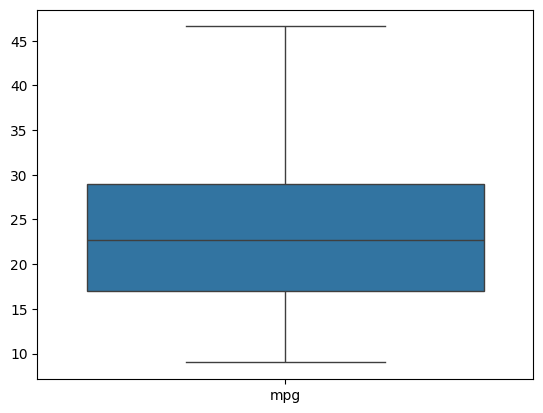

In [73]:
plt.Figure(figsize=(10,6))
sns.boxplot(data=df[['mpg']])
plt.show()

In [74]:
corr_matrix

,horsepower,cylinders,displacement,mpg
horsepower,1.000000,0.842983,0.897257,-0.778427
cylinders,0.842983,1.000000,0.950721,-0.775396
displacement,0.897257,0.950721,1.000000,-0.804203
mpg,-0.778427,-0.775396,-0.804203,1.000000


In [75]:
# ONLY use the 3 features
feature_x = df[['cylinders', 'horsepower', 'displacement']]
target_y = df['mpg']


In [76]:
feature_x

,cylinders,horsepower,displacement
0,8,130.0,307.0
1,8,165.0,350.0
2,8,150.0,318.0
3,8,150.0,304.0
4,8,140.0,302.0
...,...,...,...
393,4,86.0,140.0
394,4,52.0,97.0
395,4,84.0,135.0
396,4,79.0,120.0


In [77]:
target_y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(feature_x, target_y , test_size= 0.2 ,random_state=0)

In [80]:
x_train

,cylinders,horsepower,displacement
220,4,70.0,85.0
256,6,100.0,225.0
301,4,70.0,105.0
193,6,81.0,200.0
57,4,95.0,113.0
...,...,...,...
325,4,48.0,90.0
194,6,90.0,232.0
118,4,75.0,116.0
48,6,88.0,250.0


In [81]:
y_train

220    33.5
256    20.5
301    34.2
193    24.0
57     24.0
       ... 
325    44.3
194    22.5
118    24.0
48     18.0
174    18.0
Name: mpg, Length: 313, dtype: float64

In [82]:
x_test

,cylinders,horsepower,displacement
146,4,75.0,90.0
282,4,88.0,140.0
69,8,160.0,350.0
378,4,63.0,105.0
331,4,67.0,97.0
...,...,...,...
101,6,95.0,198.0
65,8,153.0,351.0
56,4,70.0,91.0
262,8,145.0,305.0


In [83]:
y_test

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
101    23.0
65     14.0
56     26.0
262    19.2
216    31.5
Name: mpg, Length: 79, dtype: float64

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
LRmodel=LinearRegression()

In [86]:
LRmodel.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
LRmodel.score(x_test,y_test)

#very low accuracy with linear regression

0.688204150693417

In [88]:
from sklearn.ensemble import RandomForestRegressor
randomforestmodel = RandomForestRegressor(random_state=0)
randomforestmodel.fit(x_train , y_train)
randomforestmodel.score ( x_test , y_test )  

0.8036163434456445

In [89]:
randomforestmodel.score ( x_test , y_test )  
#Accuracy = 80%

0.8036163434456445

In [90]:
input_values= x_test.iloc[[5]]
input_values

,cylinders,horsepower,displacement
257,6,90.0,232.0


In [91]:
final_prediction = randomforestmodel.predict(input_values)

In [92]:
print(f' predicted mpg {final_prediction}')
print(f'actual prediction {y_test.iloc[[5]]}')

 predicted mpg [20.35150476]
actual prediction 257    19.4
Name: mpg, dtype: float64


In [93]:
import pickle

In [94]:
modelpickle = pickle.dumps(randomforestmodel)

In [95]:
with open ('mpg.pkl', 'wb') as file:
    pickle.dump(randomforestmodel,file)

In [96]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [97]:
df.to_csv('mpg_cleaned.csv')
